In [43]:
import pandas as pd
import os
import re
import time
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt

# Question 1

## 1.A Load data into memory

In [44]:

"""
QUESTION 1
"""
""" 1.A TODO:load data into memory """
df = (pd.read_csv(dataset_path))
default_column = str(df.columns[0])
columns = default_column.split(" ")
columns = [col for col in columns if col not in ["","@"]]
df[columns]= (df[default_column].str.split(" +",expand=True))
df[columns] = df[columns].astype(float)
del df[default_column]
df.head()


,DATE,SRAD,TMAX,TMIN,RAIN,TAVE
0,1988001.0,-99.0,30.5,23.0,0.0,26.8
1,1988002.0,-99.0,31.6,23.3,0.0,27.5
2,1988003.0,-99.0,30.6,23.2,7.7,26.9
3,1988004.0,-99.0,31.6,23.5,0.9,27.6
4,1988005.0,-99.0,30.7,20.1,0.3,25.4


## 1.B Do you notice some strange pattern or unexpected behavior in the data ?

## 1.C Calculate correlation matrix

In [45]:
correlation_matrix = df[columns[1:]].corr()
print("Correlarion Matrix")
print(correlation_matrix) # Print out correlation matrix

Correlarion Matrix
      SRAD      TMAX      TMIN      RAIN      TAVE
SRAD   NaN       NaN       NaN       NaN       NaN
TMAX   NaN  1.000000  0.577194  0.152349  0.585448
TMIN   NaN  0.577194  1.000000  0.116230  0.998361
RAIN   NaN  0.152349  0.116230  1.000000  0.095971
TAVE   NaN  0.585448  0.998361  0.095971  1.000000


## 1.D Plot the Fourier transform of TAVE. Do you notice some patterns ? How can you interpret it?

/home/bipul/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


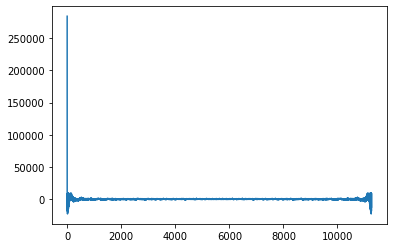

In [46]:
"""1.D TODO: Plot Fourier Transform of TAVE"""
df_tave = df["TAVE"]
y = fft(df_tave.values)
plt.plot(y)
plt.show()
# plt.savefig(os.path.join("fig.jpg"))

## 1.E Calculate probability of RAIN (RAIN>0) in 2000

In [47]:
df_2000 = df.loc[\
    (df["DATE"] > 2000000) & \
    (df["DATE"] <= 2000367) & \
    (df["RAIN"] > 0) ]
RAIN_PROBABILITY = df_2000["RAIN"].mean()
print("Probability of RAIN in 2020 is {} %".format(RAIN_PROBABILITY))

Probability of RAIN in 2020 is 22.440236686390538 %


## 1.F Calculate the median TMIN for October (calculated based on observations of any year as long as it is in October)

In [48]:
"""1.F TODO: Calculate the median TMIN for October (calculated based on observations of any year as
long as it is in October)."""
#1st October is the day 274 of a year
df_october = df.loc[\
    (df["DATE"] % 1000 >= 274) &\
    (df["DATE"] % 1000  < 274 + 31)]
TMIN_MED = df_october["TMIN"].median()
print("Median of TMIN in October is {}".format(TMIN_MED))

Median of TMIN in October is 23.5


# Question 2

## 2.A Give at least 5 ways to limit overfitting in a neural network (the more ways you find, the better)

## 2.B In what case would you use a softmax layer instead of a ReLU layer ?

## 2.C What are the advantages and drawbacks of using small batch size during training ?

## Supposing that you have weather data from a hundred stations (in the same format as in
Part 1). How would you tackle the abnormal data ? You can suppose that extreme values are
missing. Could you propose a way to fill these missing values using deep learning ? Which
kind of layers would you use ?